In [1]:
%matplotlib inline
import obspy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates


from hydrophone_data_processing import load, preprocessing, tempmatch

import matplotlib.ticker as ticker

class PrecisionDateFormatter(ticker.Formatter):
    """
    Extend the `matplotlib.ticker.Formatter` class to allow for millisecond
    precision when formatting a tick (in days since the epoch) with a
    `~datetime.datetime.strftime` format string.

    """

    def __init__(self, fmt, precision=3, tz=None):
        """
        Parameters
        ----------
        fmt : str
            `~datetime.datetime.strftime` format string.
        """
        from matplotlib.dates import num2date
        if tz is None:
            from matplotlib.dates import _get_rc_timezone
            tz = _get_rc_timezone()
        self.num2date = num2date
        self.fmt = fmt
        self.tz = tz
        self.precision = precision

    def __call__(self, x, pos=0):
        if x == 0:
            raise ValueError("DateFormatter found a value of x=0, which is "
                             "an illegal date; this usually occurs because "
                             "you have not informed the axis that it is "
                             "plotting dates, e.g., with ax.xaxis_date()")

        dt = self.num2date(x, self.tz)
        ms = dt.strftime("%f")[:self.precision]

        return dt.strftime(self.fmt).format(ms=ms)

    def set_tzinfo(self, tz):
        self.tz = tz

In [2]:
detectfiles = '/media/sda/data/borehole/detections/*.csv'
det = load.import_detections(detectfiles)
det = det[det.similarity>0.95]

In [3]:
paths = ['/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.138'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.02.GDH.2019.138'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.03.GDH.2019.138'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.04.GDH.2019.138'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.05.GDH.2019.138'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.06.GDH.2019.138']

In [4]:
day138 = load.import_corrected_data_for_single_day(paths=paths)

In [5]:
starttime = obspy.UTCDateTime('2019-05-18T14:30:00')
endtime = obspy.UTCDateTime('2019-05-18T14:40:00')
tempraw = day138.copy().trim(starttime=starttime, endtime=endtime)
tempraw = tempmatch.digest_data(tempraw)
temp = tempmatch.make_template(hole='B')

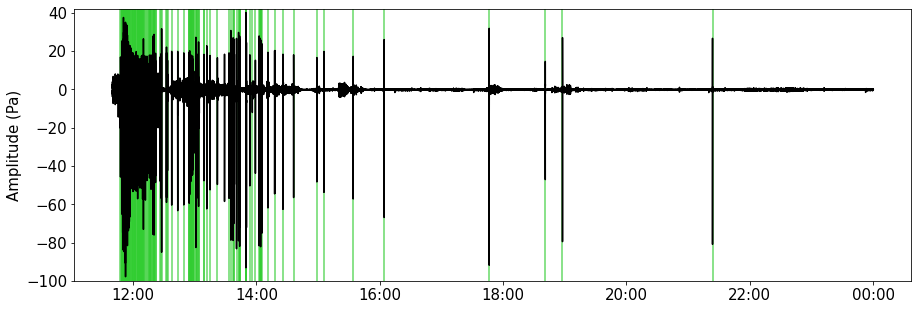

In [6]:
fig, ax = plt.subplots(figsize=(15, 5))
data = det[det.time.between('2019-05-18', '2019-05-19')].copy()

x = data.time
y = np.ones_like(x)*500
ax.plot([x, x], [-y, y], color='limegreen', alpha=0.75)

h1 = day138[0].slice(starttime=obspy.UTCDateTime('2019-05-18T11:40:00'))
ax.plot(h1.times('matplotlib'), h1.data, color='black')

ax.set_ylim(-100, 42)
ax.set_ylabel('Amplitude (Pa)', fontsize=15)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# fig.savefig('figures/bubbles_time_series_day138_AND_bubble_templates_with_reflections.pdf', bbox_inches='tight')

In [7]:
paths = load.create_datafiles(hole='b')

In [8]:
for p in sorted(paths):
    st = load.import_corrected_data_for_single_day(paths=p)
    # startdate = str(st[0].stats.starttime).split('T')[0]
    # dets = det[det.time.between()]
    start = pd.to_datetime(str(st[0].stats.starttime))
    end = start + pd.Timedelta(1, unit='D')
    dets = det[det.time.between(start, end)]
    
    if dets.shape[0]==0:
        print('nothing to see here')
    else:
        
        detx = dets.time
        dety = np.ones_like(detx)*500
        
        h1 = st[0].copy()
        h1x = h1.times('matplotlib')
        h1y = h1.data
        
        fig, ax = plt.subplots(figsize=(15, 5))
        ax.plot([detx, detx], [-dety, dety], color='limegreen')
        ax.plot(h1x, h1y, color='black')
        ax.set_ylim(h1y.min()-5, h1y.max()+5)
        fig.savefig('detection_days/{}.pdf'.format(start), bbox_inches='tight')
        plt.clf()
        plt.close()
        
    # break

nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here
nothing to see here


In [9]:
str(start)

'2020-02-03 00:00:01.574000+00:00'

In [10]:
print('it is finished')

it is finished


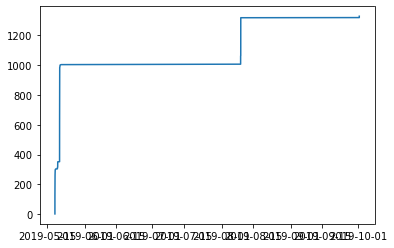

In [11]:
detx = det.time
dety = np.ones_like(detx).cumsum()

fig, ax = plt.subplots()

ax.plot(detx, dety)

In [12]:
det.time.dtype

datetime64[ns, UTC]

In [13]:
start = pd.to_datetime(str(st[0].stats.starttime))
end = start + pd.Timedelta(1, unit='D')
det[det.time.between(start, end)]

,time,similarity,template_id


In [14]:
pd.to_datetime(det.time)

1     2019-05-18 11:47:16.325000+00:00
2     2019-05-18 11:47:54.450000+00:00
3     2019-05-18 11:49:19.032000+00:00
4     2019-05-18 11:49:27.501000+00:00
6     2019-05-18 11:49:32.924000+00:00
                    ...               
150   2019-10-01 12:39:40.077999+00:00
182   2019-10-01 12:40:56.165999+00:00
190   2019-10-01 12:41:19.478999+00:00
198   2019-10-01 12:41:46.954999+00:00
204   2019-10-01 12:42:21.594999+00:00
Name: time, Length: 1329, dtype: datetime64[ns, UTC]

In [15]:
type(start)

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
type(end)

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
det.time.dtype

datetime64[ns, UTC]

In [18]:
start.tz_localize('UTC')

TypeError: Cannot localize tz-aware Timestamp, use tz_convert for conversions

In [ ]:
start = np.datetime64('2019-05-18T00:00:00', 'ns').tz_localize('UTC')
end = start + pd.Timedelta(1, unit='D')
det[det.time.between(np.datetime64(start, '[ns]'), np.datetime64(end, '[ns]'))]

In [ ]:
start = pd.to_datetime('2019-05-18T00:00:00')
end = start + pd.Timedelta(1, unit='D')
det[det.time.between(np.datetime64(start, '[ns]'), np.datetime64(end, '[ns]'))]

In [ ]:
pd.to_datetime(pd.to_datetime(startdate)-pd.Timedelta(1, unit='D'))